<p style="text-align: center;" ><font size="+3"><u><b>Laboratory 2  Part 2: Physical Data</u></b></p>

<div class="alert alert-block alert-warning">
<b>Looking at Fourier Transforms of Real Imaging Data:</b> <font color='black'>  

We have setup the microscrope according to your design from Lab 1. Place your resolution target on the stage. For these microscope experiments, use the “no filter” setting on the wheel. We will be concentrating on the star pattern target, though you will need to use the grid targets to measure pixel size and sampling frequency.
</font> 
</div>

<img src="Lab2\StarSector.png" style="width:700px">

In [35]:
# add BaITools to path
import os
import numpy as np
import sys
from IPython.display import Image
sys.path.insert(0,r'BaITools')
sys.path.insert(0,r'dlls')

dll_path = r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\dlls"
os.environ["PATH"] = dll_path + os.pathsep + os.environ["PATH"]

# for basic functions
import numpy as np
from time import sleep
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
from IPython.display import display, clear_output
import cv2
plt.rcParams['font.size'] = 16   # set the font size globally

from zelux import ZeluxCamera as Camera  # for camera

# Fourier transform of real data

<div class="alert alert-block alert-success">
<font color='black'> 1. Measure the Magnification of the system. What is the maginification and the object plane sampling frequency (samples/mm)?  </font><br/> 
</div>

NOTE: We are using the Thorlabs CS165MU camera model, not the DCC3240M; therefore, our camera’s pixel size is 3.45  microns. \
pixel size = 3.45 𝜇m \
Average Square Length: 72 pixels \
Size of one pixel = 100𝜇m / 72 pixels = 1.37 x 1.37 𝜇m per pixel \
\
Magnification = 3.45 / 1.37 = 2.5 \
sampling freq = 1/1.37 𝜇m

In [36]:
x1 = np.array([200, 312])
x2 = np.array([206, 240])

a = x1-x2

np.sqrt(a[0]**2 + a[1]**2)

72.24956747275377

<div class="alert alert-block alert-success">

<font color='black'> 2. Show an image and a <u>properly labeled</u> Fourier transform images side-by-side (e.g. using `plt.subplots(ncols=2)`, see Lab 0). <br/> Please display the base-10 logarithm of the magnitude of the Fourier transform.
</font>
</div>

In [37]:
# Image(filename=r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\distance.png")

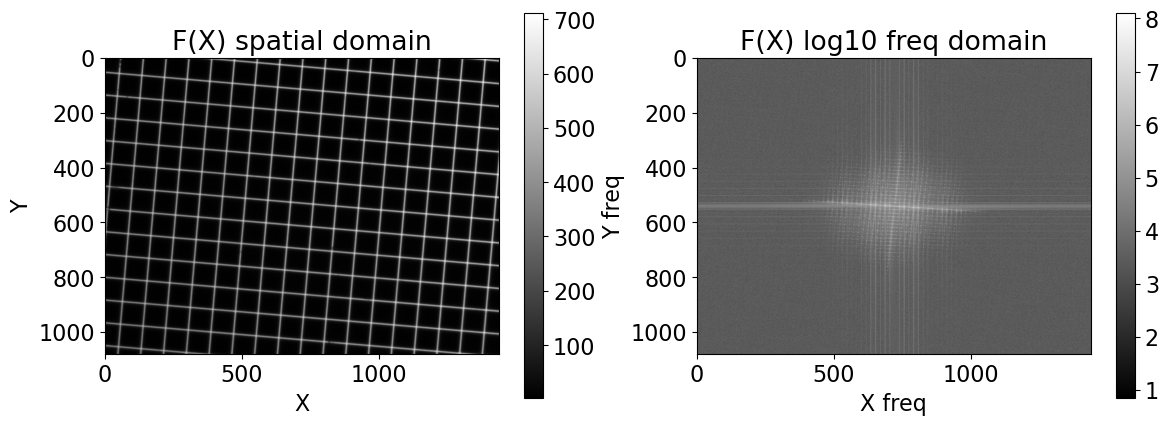

In [38]:
from numpy.fft import fft2, fftshift, ifftshift

img = np.load(r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\distance.npy")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

x = ax1.imshow(img, cmap='gray')
fig.colorbar(x, ax=ax1)
ax1.set_title('F(X) spatial domain')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

fftshifted = fftshift(fft2(ifftshift(img)))
fftshifted = np.abs(fftshifted)
fftshifted = np.log10(fftshifted + 1) 

z = ax2.imshow((fftshifted), cmap='gray')
fig.colorbar(z, ax=ax2)
ax2.set_title('F(X) log10 freq domain')
ax2.set_xlabel('X freq')
ax2.set_ylabel('Y freq')

plt.show()

<div class="alert alert-block alert-success">
<font color='black'> 3. Center your image on the star pattern (green cycle shown above) and show your image and Fourier transform pair. <br/> Place your image so that only the star pattern is in the field of view (no other targets, no text “STAR SECTOR 10D” visible) and try to get the best possible focus. Get a good exposure with wide-open aperture.
</font>
    
<font color='black'> Show the two images below and describe general features:
</font>
</div>

The left image shows the spatial domain and shows the resolution target star that has concentric rings with alternating radial “spikes” that are black and white. The log10 image also contains the same radial “spikes” in the same direction as the star on the target. There is a circular central bright region, indicating strong low-frequency content. There are also concentric ring ripples similar to the concentric circles in the start target in the image. There is a faint cross-shaped structure in the X and Y direction.

In [39]:
# Image(filename=r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\star.png")

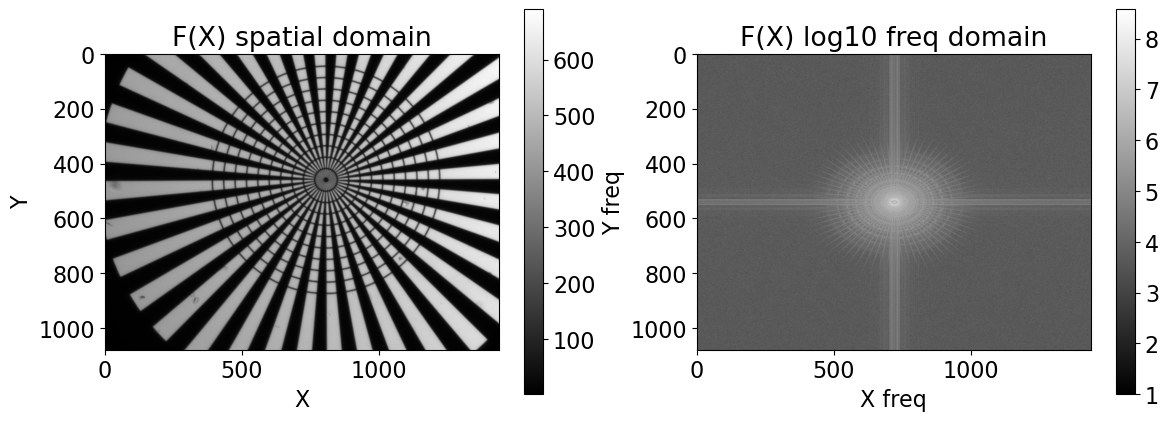

In [40]:
img = np.load(r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\star.npy")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

x = ax1.imshow(img, cmap='gray')
fig.colorbar(x, ax=ax1)
ax1.set_title('F(X) spatial domain')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

fftshifted = fftshift(fft2(ifftshift(img)))
fftshifted = np.abs(fftshifted)
fftshifted = np.log10(fftshifted + 1) 

z = ax2.imshow((fftshifted), cmap='gray')
fig.colorbar(z, ax=ax2)
ax2.set_title('F(X) log10 freq domain')
ax2.set_xlabel('X freq')
ax2.set_ylabel('Y freq')

plt.show()

# Effect of Defocus

<div class="alert alert-block alert-success">
    
<font color='black'> 4. Intentionally defocus your image. Capture another image-Fourier transform pair. <br/>
Show below and describe what you see (in particular, the changes from the focused image pair).
</font>

</div>

In the left plot, the spatial domain image appears noticeably more blurred compared to the previously focused version. The radial lines are softer, and details especially near the center are harder to see. In the right plot, the log10 frequency domain shows a more prominent central cross, but there is a smaller diameter of the frequency circle, meaning we have lost high frequency signal. The concentric circles appear blurrier and smaller, and many high-frequency components are either blurred out or no longer visible. Overall, the defocus results in a loss of fine structure in both the spatial and frequency domains.

In [41]:
# Image(filename=r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\star unfocus.png")

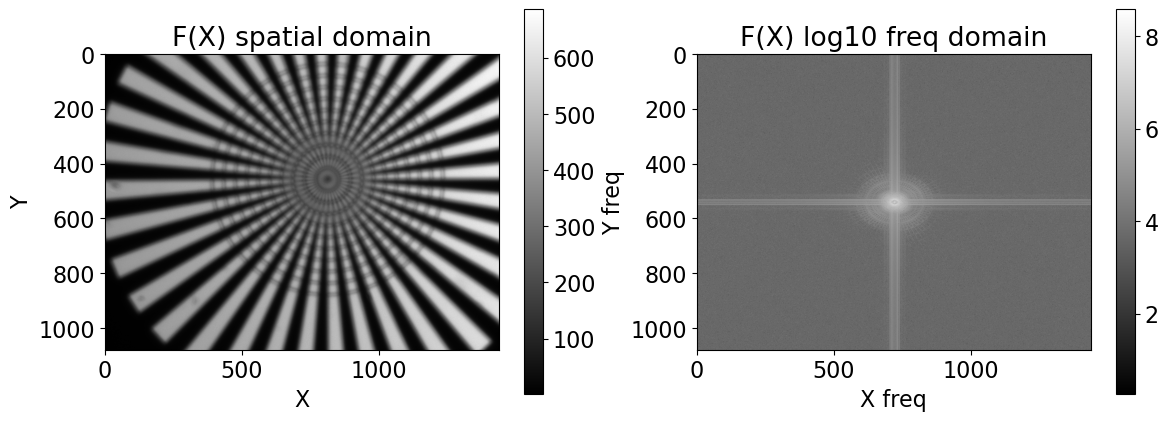

In [42]:
img = np.load(r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\star unfocus.npy")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

x = ax1.imshow(img, cmap='gray')
fig.colorbar(x, ax=ax1)
ax1.set_title('F(X) spatial domain')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

fftshifted = fftshift(fft2(ifftshift(img)))
fftshifted = np.abs(fftshifted)
fftshifted = np.log10(fftshifted + 1) 

z = ax2.imshow((fftshifted), cmap='gray')
fig.colorbar(z, ax=ax2)
ax2.set_title('F(X) log10 freq domain')
ax2.set_xlabel('X freq')
ax2.set_ylabel('Y freq')

plt.show()

<div class="alert alert-block alert-success">
    
<font color='black'> 5. <u> <i> Without changing focus (e.g. in the same defocused state) </u> </i>, shift your slide to the line pair targets and obtain an image (Fourier transform not required). <br/> Show a full-field and zoomed image of the finest line pairs that are still visible (e.g., not blurry).<br/><br/></font>
    
<font color='black'> What is the number of line-pairs/mm for this limiting visibility?   ____32.00_____________
<br/>(The following table will help you find the lp/mm for each target.)</font>

</div>

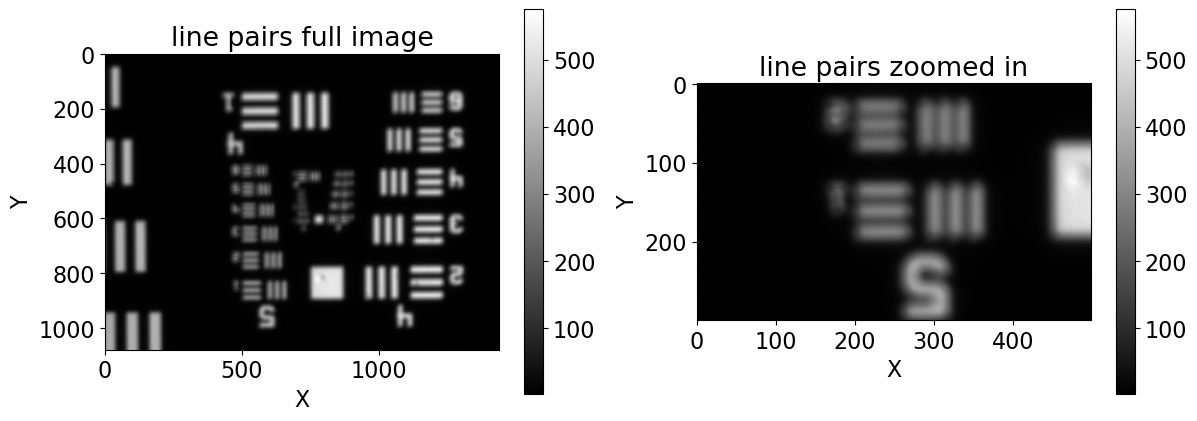

In [43]:
unfocus_lines = np.load(r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\unfocus lines.npy")
#Group 5 Element 1
zoom = unfocus_lines[700:1000, 300:800]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

x = ax1.imshow(unfocus_lines, cmap='gray')
fig.colorbar(x, ax=ax1)
ax1.set_title('line pairs full image')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

z = ax2.imshow(zoom, cmap='gray')
fig.colorbar(z, ax=ax2)
ax2.set_title('line pairs zoomed in')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

plt.show()

<img src="Lab2\LinePairTable.png" style="width:600px"> 
Values are in lp/mm.

In [44]:
# Image(filename=r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\unfocus lines.png")

group 5 element 1: 32.00 line pairs/mm


<div class="alert alert-block alert-success">
    
<font color='black'> 6. Describe how the maximum visibility of line pairs compare with what you see in the Fourier transform of the defocused star pattern? <br/> (Hint: Consider the maximum frequency seen in the Fourier image.)  <br/>
</font>

</div>

When defocused, the Fourier transform of the star pattern shows fewer high-frequency components and the outer rings are blurrier and fade away in the FT of the star pattern. The maximum visible line-pair frequency in our defocused line-pair image roughly matches the highest frequency still visible in the Fourier transform which is ~32 samples/mm. We lose this high frequency signal in the FT (far away from the origin) of the star patten, which is why we see a smaller circle in the frequency domain.

<div class="alert alert-block alert-success">
    
<font color='black'> 7. Refocus your microscope and repeat the line pair test, showing maximum visibility (full-field and zoom), and describing the relationship between the star pattern Fourier image and maximum line pair visibility.  <br/>
</font>

</div>

In [45]:
# Image(filename=r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\focus lines.png")

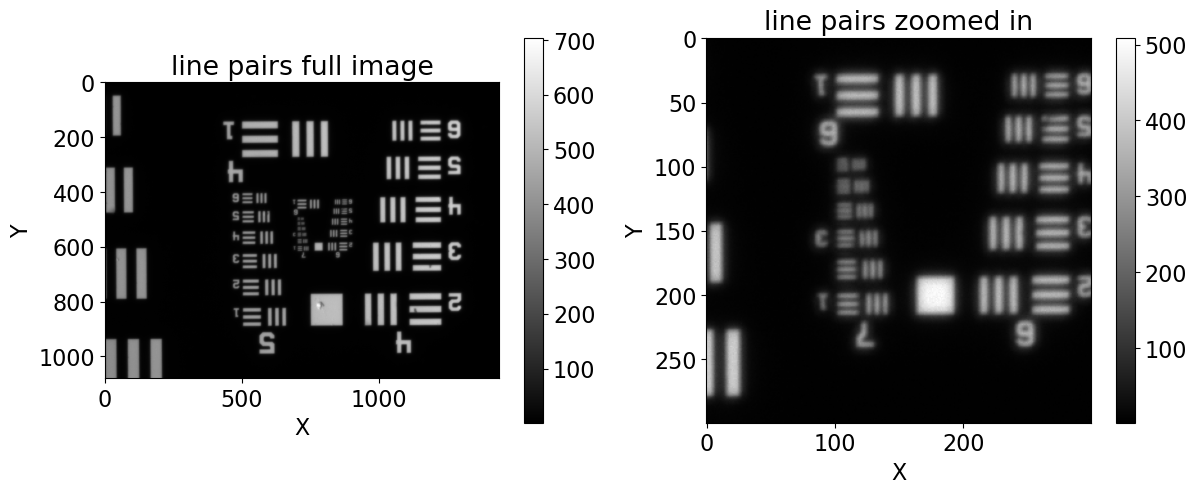

In [46]:
focus_lines = np.load(r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\focus lines.npy")
#Group 7 Element 1
zoom = focus_lines[400:700, 600:900] #~135

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

x = ax1.imshow(focus_lines, cmap='gray')
fig.colorbar(x, ax=ax1)
ax1.set_title('line pairs full image')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

z = ax2.imshow(zoom, cmap='gray')
fig.colorbar(z, ax=ax2)
ax2.set_title('line pairs zoomed in')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

plt.show()

group 7 element 1:  128.00

When you refocus, the FT of the star shows sharper, clearer outer rings meaning the higher frequency signal has returned. We can also now resolve much finer line pairs like Group 7 Element with 128 line pairs/mm. The visibility of finer line pairs directly corresponds to the presence of higher frequencies in the FT.

# Effect of Aperture

<div class="alert alert-block alert-success">
    
<font color='black'> 8. Return to the star pattern target at best focus. Compare image-Fourier pairs for three aperture settings – as shown in the picture below. <br/> Show those pairs and describe what you see. <br/> 
Recall that the range limit of the aperture motor is different on every system. Experiment with your system to find out where the limits are. <br/> 
</font>

</div>

<img src="Lab2\aperture.png" style="width:900px"> 
Example aperture position: wide open (100% open), medium aperture (60% open), small aperture (30% open)

In [47]:
# Image(filename=r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\100aperature star.png")

In [48]:
# Image(filename=r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\60aperature star.png")

In [49]:
# Image(filename=r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\30aperature star.png")

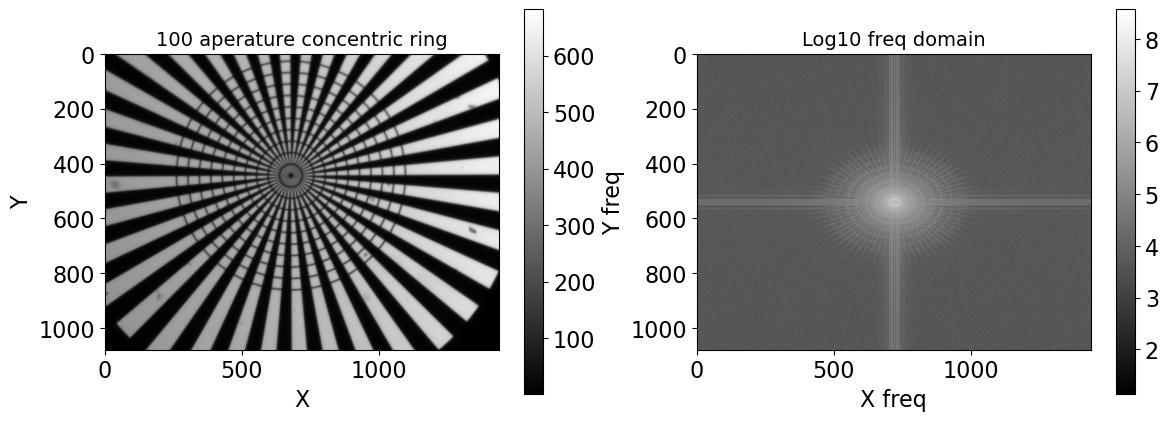

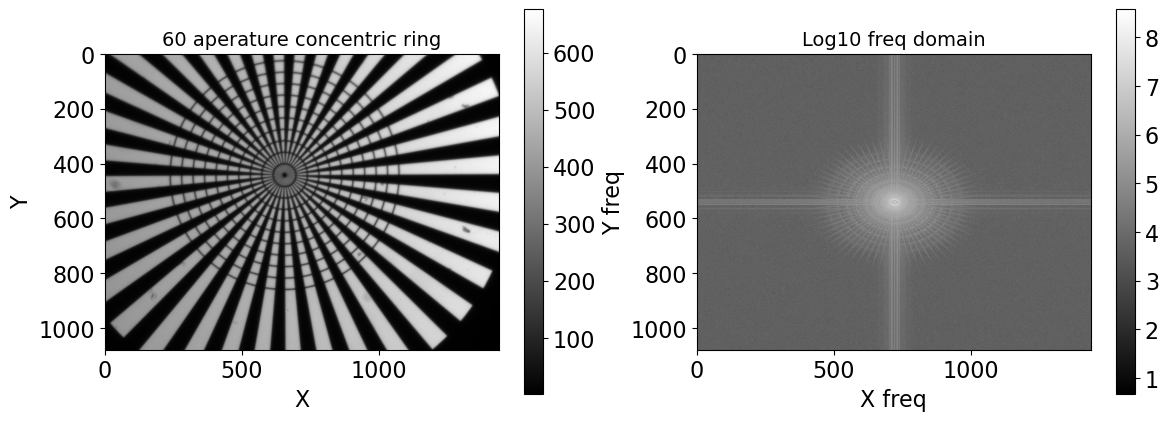

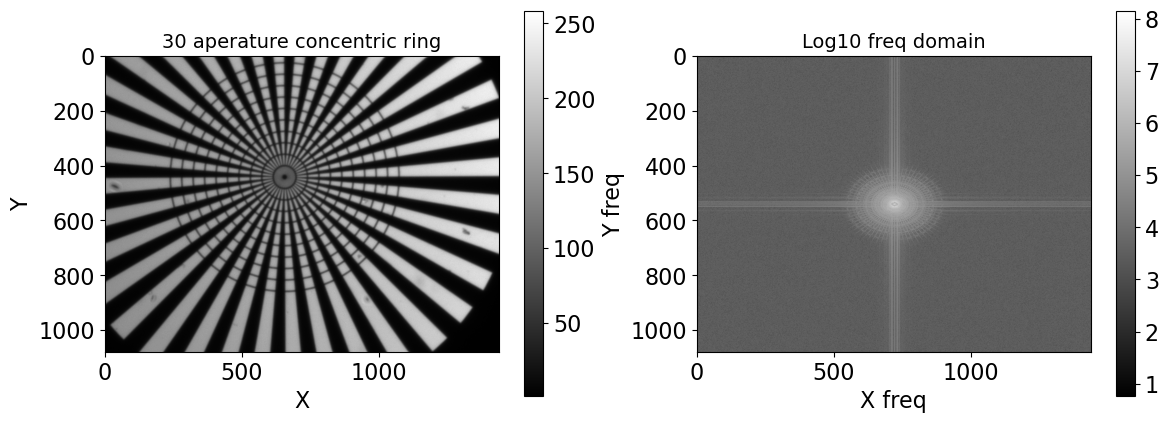

In [50]:
aperature_star100 = np.load(r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\100aperature star.npy")
aperature_star60 = np.load(r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\60aperature star.npy")
aperature_star30 = np.load(r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\30aperature star.npy")

aps = [100, 60, 30]

imgs = [aperature_star100, aperature_star60, aperature_star30]

for index, img in enumerate(imgs):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    x = ax1.imshow(img, cmap='gray')
    fig.colorbar(x, ax=ax1)
    ax1.set_title(f'{aps[index]} aperature concentric ring', fontsize=14)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')

    fftshifted = fftshift(fft2(ifftshift(img)))
    fftshifted = np.abs(fftshifted)
    fftshifted = np.log10(fftshifted + 1)

    y = ax2.imshow(np.abs(fftshifted), cmap='gray')
    fig.colorbar(y, ax=ax2)
    ax2.set_title('Log10 freq domain',fontsize=14)
    ax2.set_xlabel('X freq')
    ax2.set_ylabel('Y freq')

    plt.show()

We captured star pattern images at three different aperture settings: 100 (fully open), 60 (halfway range), and 30 (small). At an aperture setting of 100, the image appears the brightest, with strong contrast in the outer rings. However, the details in the center were slightly blurry. When the aperture was adjusted to 60, the image still had good contrast like the fully open setting. The center details were blurred slightly, similar to the fully open setting. At the narrowest setting of 30, the image became dimmer and details seemed more blurred.\
\
In the frequency domain we see that as the aperature decreases, the diameter of the central circle decreases as well. This is likely because as we decrease the aperature, the image becomes more blurry and loses fine detail which is equivalent to the high frequency signal in the fourier domain (far from origin).

<div class="alert alert-block alert-warning">
<b>Set up a Low Magnification Imaging System:</b> <font color='black'>

Let’s consider a very low magnification imaging system. Using only the 1” and ½” optical tubes construct the system shown below. The 1” tube is connected to the lens and the ½” tube is connected to the camera. For all experiments below use Filter 1. Note that to obtain a good exposure level, you will probably need to maximize the brightness of the LED illuminator.
</font> 
</div>

<img src="Lab2\ConcentricCircle.png" style="width:900px"> 


# Low magnification system

<div class="alert alert-block alert-success">
<font color='black'> 9. Measure the Magnification of the system. What is the maginification and the object plane sampling frequency (samples/mm)?  </font><br/> 
</font>
</div>

NOTE: We are using the Thorlabs CS165MU camera model, not the DCC3240M; therefore, our camera’s pixel size is 3.45 microns.\
Pixel size = 3.45 𝜇m\
Total tube length = 1-inch tube attached to the camera  + 1-inch tube after the filter wheel = 2 inches\
\
Average Square Length: 16 pixels\
Size of one pixel = 100𝜇m / 16 pixels = 6.25 x 6.25 𝜇m per pixel\
\
Magnification = 3.45 / 6.25 = 0.552\
sampling freq = 1/0.552 𝜇m = 1.81 𝜇m 


<div class="alert alert-block alert-success">
<font color='black'> 10. Repeat the following data collection for three aperture settings.
</font>
</div>

In [51]:
# Image(filename=r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\100 aperature concentric circle.png")

In [52]:
# Image(filename=r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\60 aperature concentric circle.png")

In [53]:
# Image(filename=r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\30 aperature concentric circle.png")

Text(0, 0.5, 'Y')

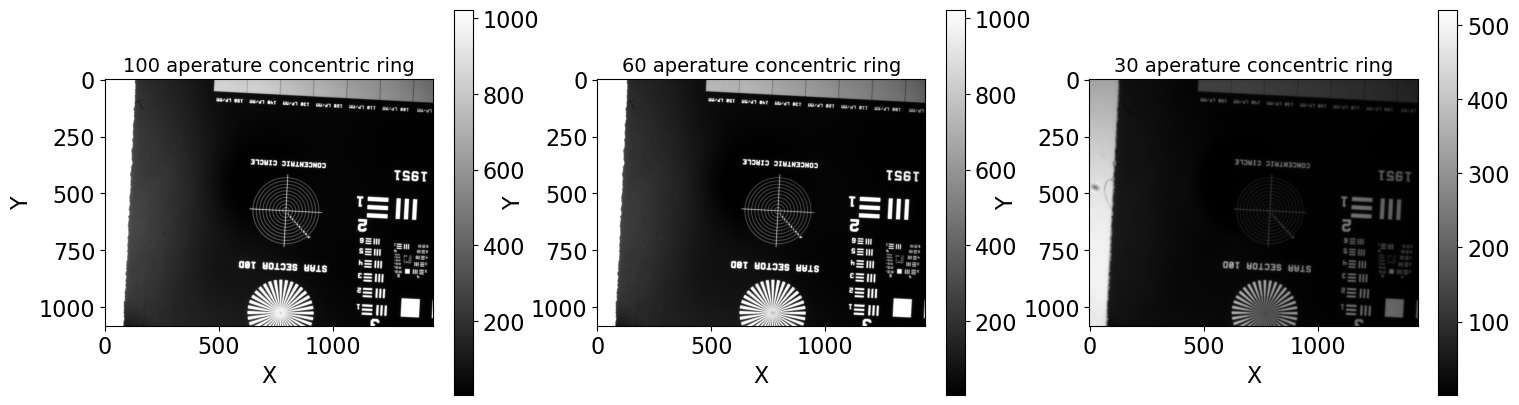

In [54]:
aperature_circle100 = np.load(r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\100 aperature concentric circle.npy")
aperature_circle60 = np.load(r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\60 aperature concentric circle.npy")
aperature_circle30 = np.load(r"C:\Users\willi\OneDrive - The Webb Schools\Documents\BME Year 3\Build_Imager\Lab2\30 aperature concentric circle.npy")
#30
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

x = ax1.imshow(aperature_circle100, cmap='gray')
fig.colorbar(x, ax=ax1)
ax1.set_title('100 aperature concentric ring', fontsize=14)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

y = ax2.imshow(aperature_circle60, cmap='gray')
fig.colorbar(y, ax=ax2)
ax2.set_title('60 aperature concentric ring',fontsize=14)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

z = ax3.imshow(aperature_circle30, cmap='gray')
fig.colorbar(z, ax=ax3)
ax3.set_title('30 aperature concentric ring', fontsize=14)
ax3.set_xlabel('X')
ax3.set_ylabel('Y')

<div class="alert alert-block alert-success">
    
<font color='black'> 11. Using the resolution target focus on the concentric ring. Obtain a zoomed image of the concentric rings only (no text below) and show both image-domain and frequency-domain images with proper axis labels <i> for each of the three aperture settings: </i> <br/>
</font>

</div>

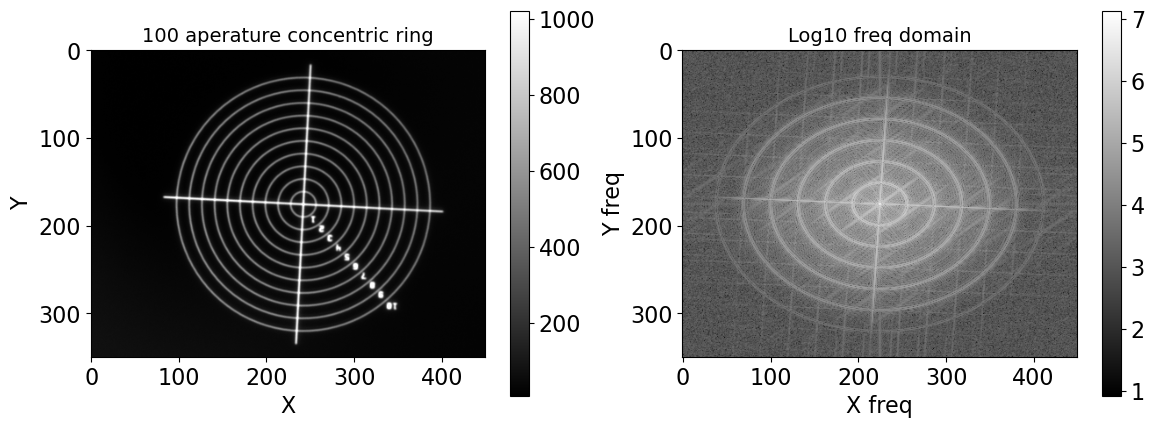

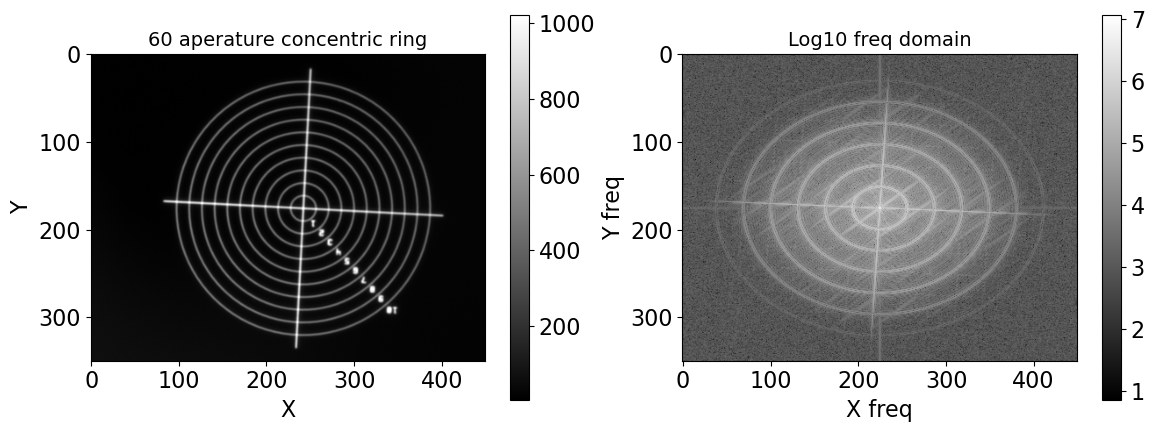

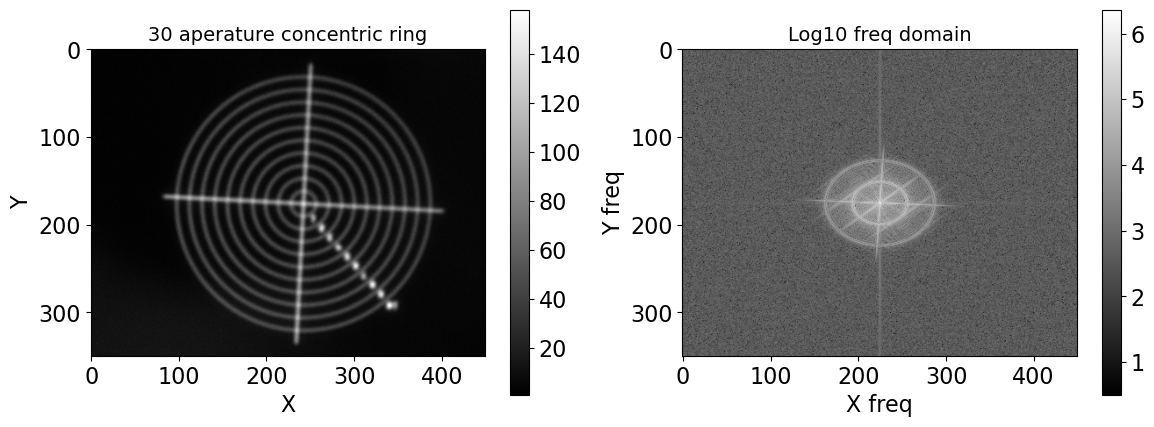

In [55]:
zoomed100 = aperature_circle100[400:750, 550:1000]
zoomed60 = aperature_circle60[400:750, 550:1000]
zoomed30 = aperature_circle30[400:750, 550:1000]

aps = [100, 60, 30]

imgs = [zoomed100, zoomed60, zoomed30]

for index, img in enumerate(imgs):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    x = ax1.imshow(img, cmap='gray')
    fig.colorbar(x, ax=ax1)
    ax1.set_title(f'{aps[index]} aperature concentric ring', fontsize=14)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')

    fftshifted = fftshift(fft2(ifftshift(img)))
    fftshifted = np.abs(fftshifted)
    fftshifted = np.log10(fftshifted + 1)

    y = ax2.imshow(np.abs(fftshifted), cmap='gray')
    fig.colorbar(y, ax=ax2)
    ax2.set_title('Log10 freq domain',fontsize=14)
    ax2.set_xlabel('X freq')
    ax2.set_ylabel('Y freq')

    plt.show()

<div class="alert alert-block alert-success">
    
<font color='black'> 12. Explain what you are seeing in the three cases. <br/>
</font>

</div>

For the 100 aperture, the image is clear and sharp, and in the frequency domain, there are also 10 circles indicating a large spread of high spatial frequencies. This demonstrates that at a wide aperture, there is a strong resolution. At the 60 aperture, the image is slightly less in focus than the 100 aperture, and in the frequency domain, there is less high frequency detail. At the 30 aperture, the image is blurry, but the circles remain distinct, and in the frequency-domain, there is a concentrated center, indicating that high frequency content has been lost. This indicates that smaller apertures reduce image sharpness by blocking fine details and allowing only the blurrier, low-frequency parts of the image to pass through.